1.Import Libraries & Load Data

In [26]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load cleaned dataset from pickle file
df = pd.read_pickle("../processed data/hotel_bookings_cleaned.pkl")

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,has_agent
0,Resort Hotel,0,315,2015,July,27,1,0,0,2,...,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,True
1,Resort Hotel,0,315,2015,July,27,1,0,0,2,...,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,True
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,True
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,True
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,True


2.Probability of Cancellation by Room Type

In [12]:
room_cancel_prob = df.groupby('reserved_room_type')['is_canceled'].mean()
print("P(Cancel | Room Type):\n", room_cancel_prob)


P(Cancel | Room Type):
 reserved_room_type
A    0.259735
B    0.318318
C    0.323497
D    0.300954
E    0.272652
F    0.301452
G    0.359162
H    0.407718
L    0.333333
P    1.000000
Name: is_canceled, dtype: float64


3. Probability: P(Cancel | Month / Season)

P(Cancel | Month):
 arrival_date_month
January      0.221180
February     0.232081
March        0.243578
April        0.304628
May          0.292315
June         0.303155
July         0.318019
August       0.321844
September    0.245478
October      0.236804
November     0.211096
December     0.268616
Name: is_canceled, dtype: float64


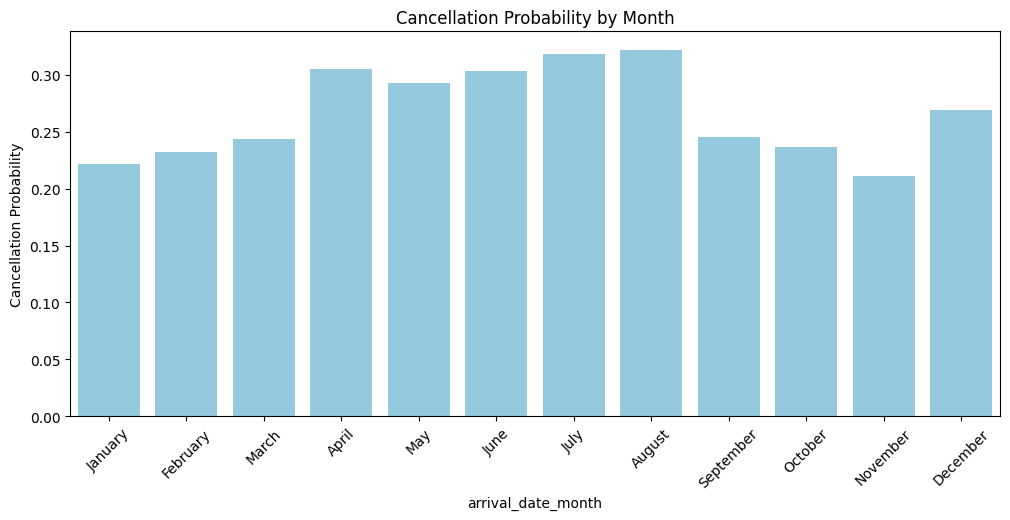

In [25]:
month_cancel_prob = df.groupby('arrival_date_month')['is_canceled'].mean()
month_order = ['January','February','March','April','May','June','July','August',
               'September','October','November','December']
month_cancel_prob = month_cancel_prob.reindex(month_order)

# Display table
print("P(Cancel | Month):\n", month_cancel_prob)

# Plot
plt.figure(figsize=(12,5))
sns.barplot(x=month_cancel_prob.index, y=month_cancel_prob.values, color='skyblue')
plt.xticks(rotation=45)
plt.ylabel("Cancellation Probability")
plt.title("Cancellation Probability by Month")
plt.show()


4.Probability: P(Cancel | Market Segment & Deposit Type)

P(Cancel | Market Segment):
 market_segment
Aviation         0.198238
Complementary    0.125356
Corporate        0.121198
Direct           0.147154
Groups           0.270134
Offline TA/TO    0.148535
Online TA        0.353483
Undefined        1.000000
Name: is_canceled, dtype: float64

P(Cancel | Deposit Type):
 deposit_type
No Deposit    0.266871
Non Refund    0.947013
Refundable    0.242991
Name: is_canceled, dtype: float64


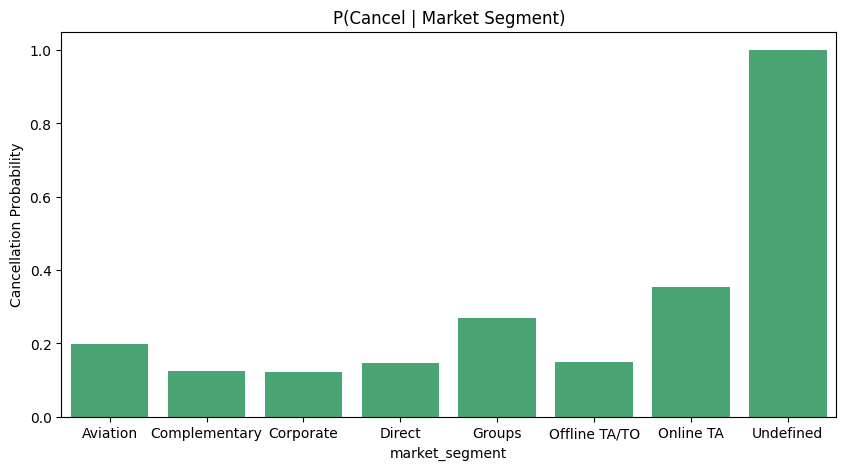

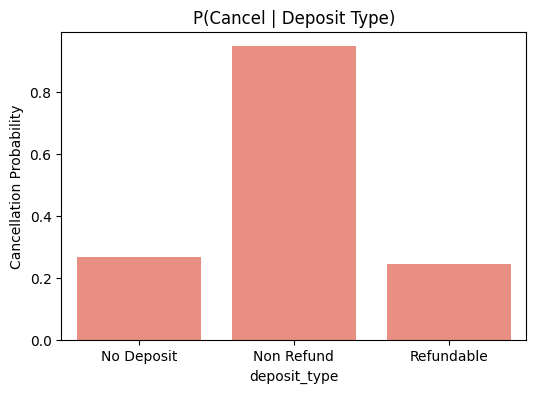

In [31]:
segment_cancel_prob = df.groupby('market_segment')['is_canceled'].mean()
deposit_cancel_prob = df.groupby('deposit_type')['is_canceled'].mean()

print("P(Cancel | Market Segment):\n", segment_cancel_prob)
print("\nP(Cancel | Deposit Type):\n", deposit_cancel_prob)

# Plots
# Market Segment
plt.figure(figsize=(10,5))
sns.barplot(x=segment_cancel_prob.index, y=segment_cancel_prob.values, color='mediumseagreen')
plt.ylabel("Cancellation Probability")
plt.title("P(Cancel | Market Segment)")
plt.show()

# Deposit Type
plt.figure(figsize=(6,4))
sns.barplot(x=deposit_cancel_prob.index, y=deposit_cancel_prob.values, color='salmon')
plt.ylabel("Cancellation Probability")
plt.title("P(Cancel | Deposit Type)")
plt.show()



5.Visualization: Bar Plots for Probabilities

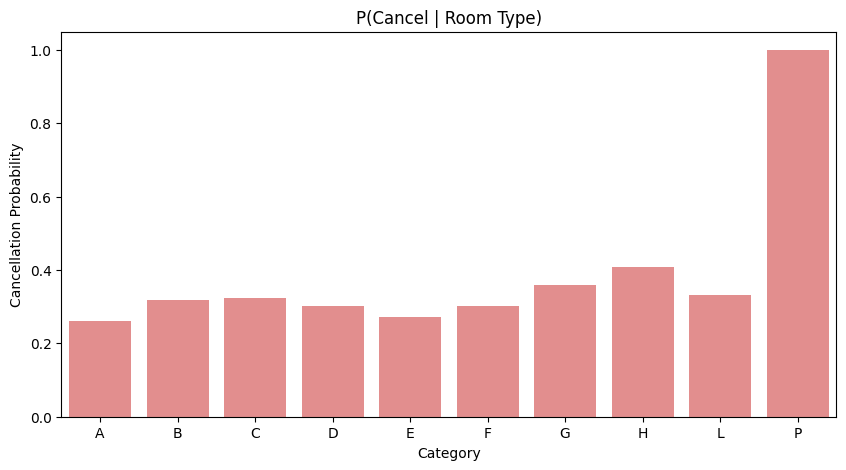

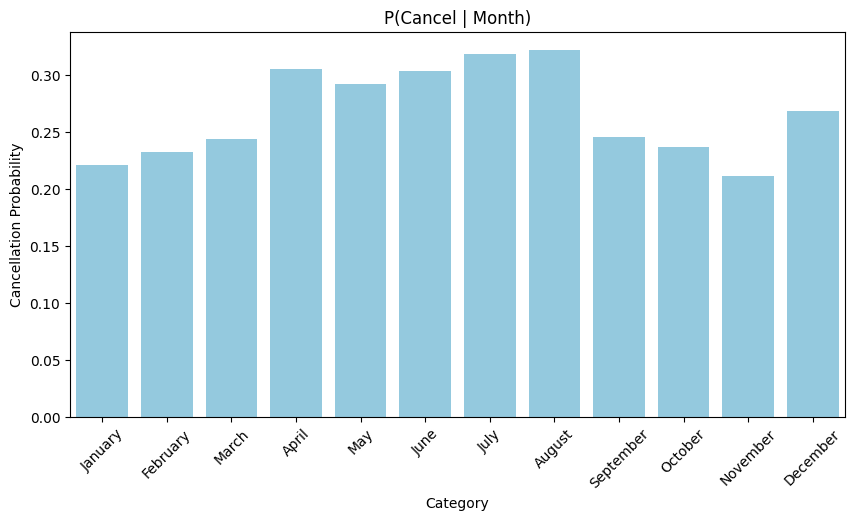

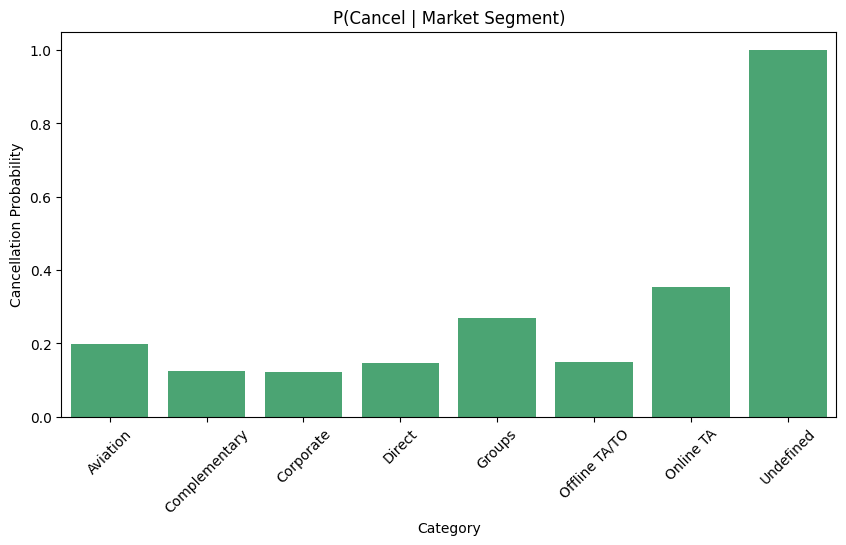

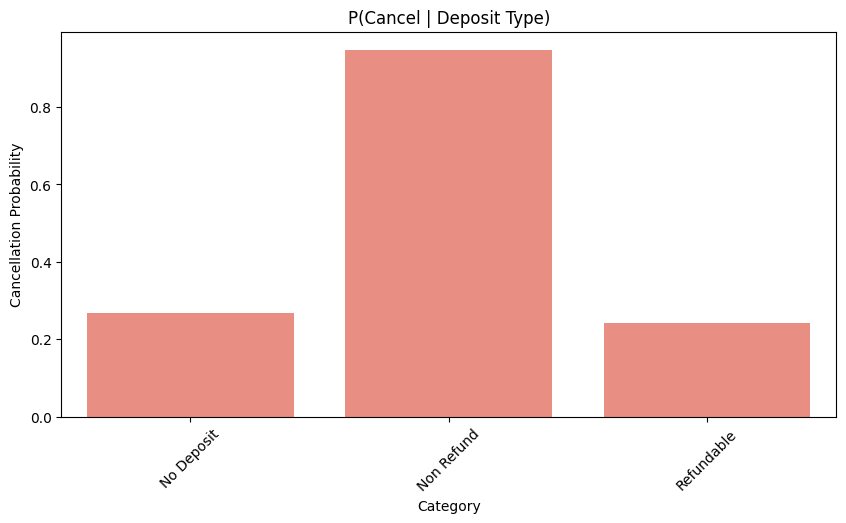

In [30]:

def plot_prob(prob_series, title, xlabel='Category', ylabel='Cancellation Probability', rotate=45, color='skyblue'):
    plt.figure(figsize=(10,5))
    sns.barplot(x=prob_series.index, y=prob_series.values, color=color)  # استخدم color بدل palette
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.xticks(rotation=rotate)
    plt.show()


plot_prob(room_cancel_prob, 'P(Cancel | Room Type)', rotate=0, color='lightcoral')
plot_prob(month_cancel_prob, 'P(Cancel | Month)', color='skyblue')
plot_prob(segment_cancel_prob, 'P(Cancel | Market Segment)', color='mediumseagreen')
plot_prob(deposit_cancel_prob, 'P(Cancel | Deposit Type)', color='salmon')


6.Chi-square Tests for Categorical Features

In [32]:
categorical_cols = ['reserved_room_type', 'arrival_date_month', 'market_segment', 'deposit_type']

chi_results = []

for col in categorical_cols:
    cont_table = pd.crosstab(df[col], df['is_canceled'])
    chi2, p, dof, expected = chi2_contingency(cont_table)
    chi_results.append({
        'Feature': col,
        'Chi2': chi2,
        'p-value': p,
        'Significant': p<0.05
    })

chi_df = pd.DataFrame(chi_results)
print("Chi-square Test Results:")
print(chi_df)


Chi-square Test Results:
              Feature         Chi2        p-value  Significant
0  reserved_room_type   296.664801   1.330570e-58         True
1  arrival_date_month   640.623240  2.836459e-130         True
2      market_segment  4267.879595   0.000000e+00         True
3        deposit_type  2380.724926   0.000000e+00         True


7. Mann-Whitney Test for Numeric Features

In [33]:
numeric_cols = ['lead_time', 'adr', 'stays_in_week_nights', 'adults', 'children', 'babies']

mw_results = []

for col in numeric_cols:
    cancel = df[df['is_canceled']==1][col]
    not_cancel = df[df['is_canceled']==0][col]
    stat, p = mannwhitneyu(cancel, not_cancel, alternative='two-sided')
    mw_results.append({
        'Feature': col,
        'Statistic': stat,
        'p-value': p,
        'Significant': p<0.05
    })

mw_df = pd.DataFrame(mw_results)
print("Mann-Whitney Test Results:")
print(mw_df)


Mann-Whitney Test Results:
                Feature    Statistic        p-value  Significant
0             lead_time  983874191.5   0.000000e+00         True
1                   adr  901710131.5   0.000000e+00         True
2  stays_in_week_nights  853339625.5  2.149259e-175         True
3                adults  829805119.0  1.472644e-158         True
4              children  791969696.0   1.638926e-73         True
5                babies  757477099.0   3.442764e-10         True


8. Save Summary Table for PCA / Clustering

In [34]:
import os
import pandas as pd

# Map cancellation probabilities to each row
df['P_Cancel_Room'] = df['reserved_room_type'].map(room_cancel_prob)
df['P_Cancel_Month'] = df['arrival_date_month'].map(month_cancel_prob)
df['P_Cancel_Segment'] = df['market_segment'].map(segment_cancel_prob)
df['P_Cancel_Deposit'] = df['deposit_type'].map(deposit_cancel_prob)

# Save as pickle file in processed data folder
file_path = os.path.join(folder, 'hotel_cancel_probabilities_for_PCA.pkl')
df.to_pickle(file_path)

print(f"Pickle file saved successfully in: {file_path}")


Pickle file saved successfully in: ../processed data\hotel_cancel_probabilities_for_PCA.pkl
